In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def get_dataset_name(file_name_with_dir):
    filename_without_dir = file_name_with_dir.split('/')[-1]
    temp = filename_without_dir.split('_')[:-1]
    dataset_name = "_".join(temp)
    return dataset_name

# Exploring the data

## Intra Train data (only Rest state)

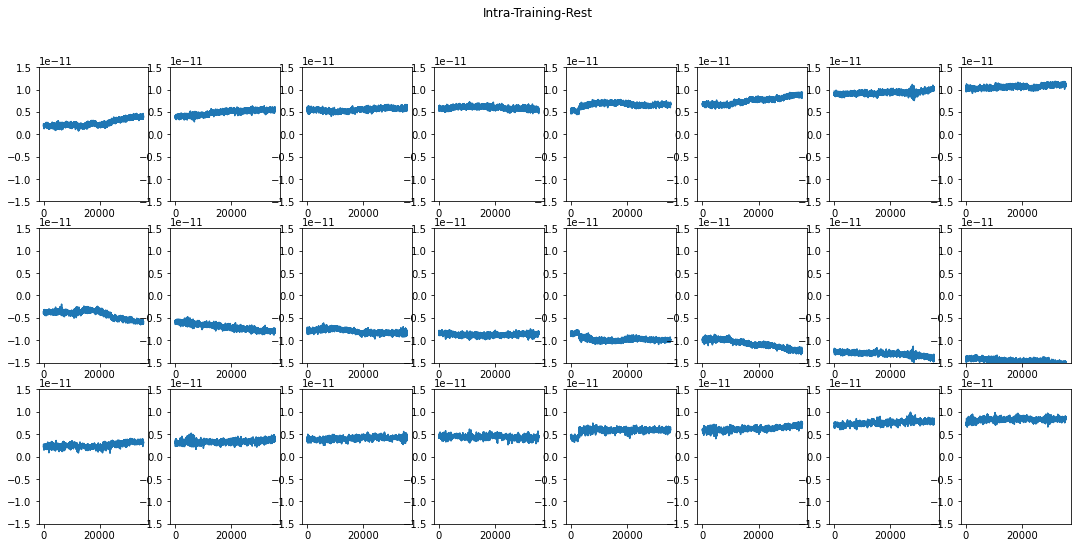

In [0]:
# Rest state

directory = "/content/drive/My Drive/DL-final_project/Data/Intra/train/" 
file_name_list = ["rest_105923_1.h5", "rest_105923_2.h5", "rest_105923_3.h5", "rest_105923_4.h5",
                  "rest_105923_5.h5", "rest_105923_6.h5", "rest_105923_7.h5", "rest_105923_8.h5"]

n_sensors = 3
n_files = len(file_name_list)

fig, axs = plt.subplots(n_sensors, n_files)
fig.set_size_inches(18.5, 0.8*10.5)

for i in range(n_files):
    filename_path = directory + file_name_list[i]
    with h5py.File(filename_path,'r') as f:
        dataset_name = get_dataset_name(filename_path)
        matrix = f.get(dataset_name)[()]
    for s in range(n_sensors):
        ax = axs[s,i]
        ax.plot(matrix[s,:])
        ax.set_ylim((-15e-12,15e-12))
        
fig.suptitle("Intra-Training-Rest")
plt.show()

## Intra Test data (only Rest state)

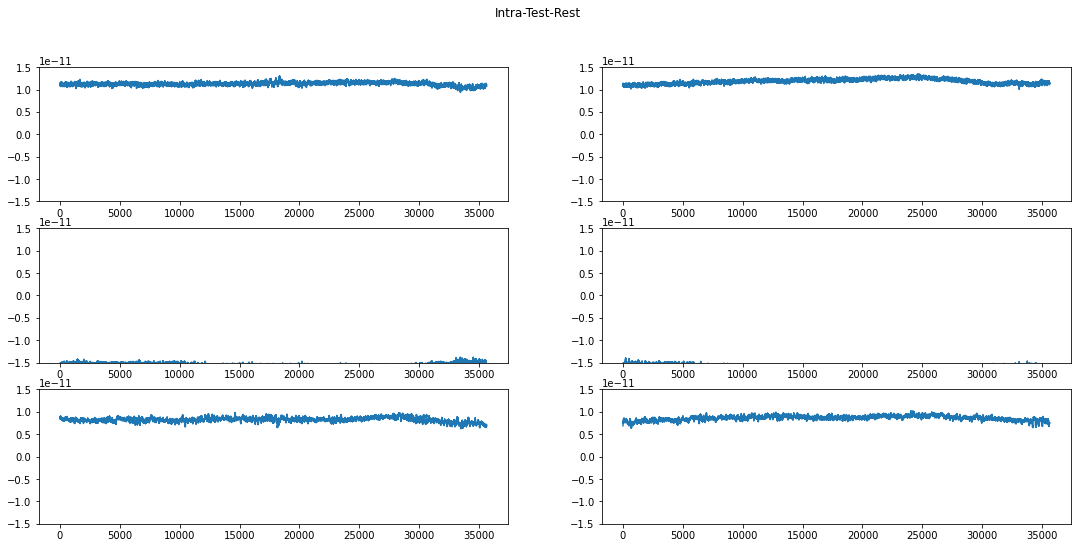

In [0]:
# Rest state

directory = "/content/drive/My Drive/DL-final_project/Data/Intra/test/" 
file_name_list = ["rest_105923_9.h5", "rest_105923_10.h5"]

n_sensors = 3
n_files = len(file_name_list)

fig, axs = plt.subplots(n_sensors, n_files)
fig.set_size_inches(18.5, 0.8*10.5)

for i in range(n_files):
    filename_path = directory + file_name_list[i]
    with h5py.File(filename_path,'r') as f:
        dataset_name = get_dataset_name(filename_path)
        matrix = f.get(dataset_name)[()]
    for s in range(n_sensors):
        ax = axs[s,i]
        ax.plot(matrix[s,:])
        ax.set_ylim((-15e-12,15e-12))
        
fig.suptitle("Intra-Test-Rest")
plt.show()

# Recording the maxs and mins across all 8 chunks, for each class

### Intra

In [0]:
maxs_array = np.full((n_sensors, 4), -1000).astype(np.float64)
mins_array = np.full((n_sensors, 4), 1000).astype(np.float64)

for class_id, class_name in enumerate(class_names):
  
  for chunk_id in range(1,9):
    print("Processing file: {}-{}".format(class_name, chunk_id))
    filename_path = directory + '/' + class_name + '_' + str(subject_id) + '_' + str(chunk_id) + '.h5'

    ### Supplied code
    with h5py.File(filename_path,'r') as f:
      dataset_name = get_dataset_name(filename_path)
      matrix = f.get(dataset_name)[()]
    ###

    chunk_maxs = matrix.max(axis=1)
    for sensor_id in range(n_sensors):
      if chunk_maxs[sensor_id] > maxs_array[sensor_id, class_id]:
        maxs_array[sensor_id, class_id] = chunk_maxs[sensor_id].copy()


    chunk_mins = matrix.min(axis=1)
    for sensor_id in range(n_sensors):
      if chunk_mins[sensor_id] < mins_array[sensor_id, class_id]:
        mins_array[sensor_id, class_id] = chunk_mins[sensor_id].copy()


In [0]:
maxs_file_path = "/content/drive/My Drive/DL-final_project/data_stats/intra_train_maxs.txt"
mins_file_path = "/content/drive/My Drive/DL-final_project/data_stats/intra_train_mins.txt"

np.savetxt(maxs_file_path, maxs_array, delimiter=',')
np.savetxt(mins_file_path, mins_array, delimiter=',')

### Cross


In [0]:
directory = "/content/drive/My Drive/DL-final_project/Data/Cross/train/" 
subject_id_list = [113922, 164636]

class_names = ['rest', 'task_motor', 'task_story_math', 'task_working_memory']
n_sensors = 248        # FIXED: No. of features (sensors) in the signal
steps_per_file = 35624 # FIXED


In [12]:
# Recording the maxs and mins across all 8 chunks, for all 4 classes

maxs_array = np.full((n_sensors, 4), -1000).astype(np.float64)
mins_array = np.full((n_sensors, 4), 1000).astype(np.float64)

for subject_id in subject_id_list:
  print("Subject:", subject_id)

  for class_id, class_name in enumerate(class_names):
    
    for chunk_id in range(1,9):
      print("Processing file: {}-{}".format(class_name, chunk_id))
      filename_path = directory + class_name + '_' + str(subject_id) + '_' + str(chunk_id) + '.h5'

      ### Supplied code
      with h5py.File(filename_path,'r') as f:
        dataset_name = get_dataset_name(filename_path)
        matrix = f.get(dataset_name)[()]
      ###

      chunk_maxs = matrix.max(axis=1)
      for sensor_id in range(n_sensors):
        if chunk_maxs[sensor_id] > maxs_array[sensor_id, class_id]:
          maxs_array[sensor_id, class_id] = chunk_maxs[sensor_id].copy()


      chunk_mins = matrix.min(axis=1)
      for sensor_id in range(n_sensors):
        if chunk_mins[sensor_id] < mins_array[sensor_id, class_id]:
          mins_array[sensor_id, class_id] = chunk_mins[sensor_id].copy()


Subject: 113922
Processing file: rest-1
Processing file: rest-2
Processing file: rest-3
Processing file: rest-4
Processing file: rest-5
Processing file: rest-6
Processing file: rest-7
Processing file: rest-8
Processing file: task_motor-1
Processing file: task_motor-2
Processing file: task_motor-3
Processing file: task_motor-4
Processing file: task_motor-5
Processing file: task_motor-6
Processing file: task_motor-7
Processing file: task_motor-8
Processing file: task_story_math-1
Processing file: task_story_math-2
Processing file: task_story_math-3
Processing file: task_story_math-4
Processing file: task_story_math-5
Processing file: task_story_math-6
Processing file: task_story_math-7
Processing file: task_story_math-8
Processing file: task_working_memory-1
Processing file: task_working_memory-2
Processing file: task_working_memory-3
Processing file: task_working_memory-4
Processing file: task_working_memory-5
Processing file: task_working_memory-6
Processing file: task_working_memory-7

In [0]:
maxs_file_path = "/content/drive/My Drive/DL-final_project/data_stats/cross_train_maxs.txt"
mins_file_path = "/content/drive/My Drive/DL-final_project/data_stats/cross_train_mins.txt"

np.savetxt(maxs_file_path, maxs_array, delimiter=',')
np.savetxt(mins_file_path, mins_array, delimiter=',')